# Simple and Logarithmic Return

Let's defined and clarify the definitions and usage of simple and logarithmic returns for financial assets like stocks or portfolios.<br>
This notebook is based on Panna Miskolczi's "Note on simple and logarithmic returns" paper. For our purpose, we use the daily stock prices of the bank Goldman Sachs (ticker: GS), Google (ticker: GOOG) and Apple (ticker: AAPL). and for the risk calculation, we focus on the following risk measures:
1. standard deviation
2. semivariance
3. Value at Risk
4. Expected Shortfall

### Simple return
Return is the profit of an investment over a period of time, expressed as a proportion of the original investment. Given $P_0$, the price of an asset at time $0$ and $P_T$, the price of an asset at time $T$. If there is no cash flow in this time $[0,T]$ interval, we therefore speak of a *one-period simple net return* and we introduce the notation $R^S_{[0,T]}[1]$ so that:

$R^S_{[0,T]}[1] = \frac{P_T - P_0}{P_0} = \frac{P_T}{P_0} - 1$

The *one-period gross return* of an asset is given in terms of the simple return:

$GrR^S_{[0,T]}[1] = R^S_{[0,T]}[1] + 1$

Let's devide the interval $[0,T]$ into $n$ **pair wise disjointed intervals** with $t_0 = 0$ and $t_n = T$:

$GrR^S_{[0,T]}[n] = \prod_{i=1}^{n}{GrR^S_{[t_{i-1},t_i]}[1]} = \prod_{i=1}^{n}{(1 + R^S_{[t_{i-1},t_i]}[1])}$

### Logarithmic return
Abbreviated log return. Let's devide the interval $[0,T]$ into $n$ **equidistant intervals** with $t_0 = 0$ and $t_n = T$. We will assume that on every $[t_{i-1}, t_i]$ interval, the subinterval return $R$ is the same as for the $n-1$ other subinterval.

$R = \frac{R^*_{[0,T]}[1]}{n}$ such that:

$GrR^S_{[0,T]}[n] = \prod_{i=1}^{n}{(1 + R^S_{[t_{i-1},t_i]}[1])} = (1+R)^n = (1 + \frac{R^*_{[0,T]}[1]}{n})^n$

Since $t_0$ and $t_n$ are the 0th and the last time points respectively:

$GrR^S_{[0,T]}[n] = \frac{1}{P_0} * \prod_{i=1}^{n-1}{\frac{P_{t_i}}{P_{t_i}}} * P_T = \frac{P_T}{P_0} = (1 + \frac{R^*_{[0,T]}[1]}{n})^n$

Let's make the length of the $n$ $[t_{i-1}, t_i]$ subintervals tend towards 0 such as $n -> +\infty$.

$\lim_{n \to +\infty}{\frac{P_T}{P_0}} = \lim_{n \to +\infty}{(1 + \frac{R^*_{[0,T]}[1]}{n})^n} = e^{R^*_{[0,T]}[1]}$ by the definition of the exponential function.

Since we are interested in returns, we apply the logarithm: $ln(\frac{P_T}{P_0}) = R^*_{[0,T]}[1]$

This is called the one-period logarithmic return of an asset. So we define the one-period log return as the logarithm of the one-period simple gross return and we use the notation $R^L_{[0,T]}[1]$ so that:

$R^L_{[0,T]}[1] = ln(\frac{P_T}{P_0}) = ln(1 + R^S_{[0,T]}[1])$

$R^L_{[0,T]}[1] = ln(\frac{P_{t_1}}{P_{t_0}} * \frac{P_{t_2}}{P_{t_1}} * ... * \frac{P_{t_n}}{P_{t_{n-1}}}) = \sum_{i=1}^{n}{ln(\frac{P_{t_n}}{P_{t_{n-1}}})}$

##### Summary

$R^S_{t} = R^S_{[t, t-1]}[1] = \frac{P_t}{P_{t-1}} - 1$ and $R^S_{t} = e^{R^L_{t}} - 1$

$R^L_t = R^L_{[t, t-1]}[1] = ln(\frac{P_T}{P_{t-1}})$ and $R^L_{t} = ln(1 + R^S_{t})$

## Applying simple and logarithmic returns to portfolios (of assets)

Calculating the simple and logarithmic returns of a portfolio differs due to the rules of sums, leading to diverging effects and results that can be sought after. The following notation is used:

- $n$ : number of assets in the portfolio
- $i$ : reference of an asset in the portfolio
- $S_t$ : amoiunt of money invested in the portfolio at time t
- $S_{t, i}$ : amount of money invested in an asset i at time t
- $P_{t, i}$ : price of asset i at time t
- $W_{t, i}$ : relative weights of the asset i in porfolio at time t
- $k_i$ : number of asset i in portfolio

with: $S_{t, i} = k_i * P_{t,i} = W_{t, i} * S_t$

$S_t = \sum^{n}_{i = 1}{S_{t, i}} = \sum^{n}_{i = 1}{k_i * P_{t, i}}$

$W_{t, i} = \frac{S_{t, i}}{S_{t}} = \frac{k_i * P_{t, i}}{\sum^{n}_{i = 1}{k_i * P_{t, i}}}$ with $\sum^{n}_{i = 1}{W_{t, i}} = 1$

##### Simple return of a portfolio
Similar to the simple return of an asset, we can define the simple return of a portfolio at time $t$ as the gain (or loss) in value of the profolio relative to the starting value:

$R^S_t = \frac{S_t}{S_{t-1}} - 1$

Using the fact that the weights sum up to one and the equation above where is the simple return $R^S_t$ of asset $i$ at time $t$, we can rewrite $S_t$ such as:

$S_t = \sum^{n}_{i = 1}{k_i * P_{t, i}} = \sum^{n}_{i = 1}{k_i * P_{t-1, i} * (1+R^S_t)} = \sum^{n}_{i = 1}{S_{t-1, i} * (1+R^S_t)} = \sum^{n}_{i = 1}{S_{t-1} * W_{t-1,i} * (1+R^S_t)}$

This provides the simple return of a portfolio at time $t$:

$R^S_t = \frac{S_t}{S_{t-1}} - 1 = \sum^{n}_{i=1}{W_{t-1,i}*R^S_{t,i}}$

The portfolio simple return is the sum of the weighted simple returns of the constituents of the considered portfolio.

##### Logarithmic return of a portfolio

The logarithmic return of a porfolio, nioted $R^L_t$ at time $t$ can be defined analogously to the logarithmic return of an asset such as:

$R^L_t = ln(\frac{S_t}{S_{t-1}}) = ln(1 + \sum^{n}_{i=1}{W_{t-1,i}*R^S_{t,i}}) = ln(1 + \sum^{n}_{i=1}{W_{t-1,i}*E^{R^L_{t,i}})}$ where $R^L_{t,i}$ is the log return of asset $i$ at time $t$.

Because of the rules of logarithm, it cannot be written as the sum of the weighted log returns of the constituents of the considered portfolio. 

$R^L_t = ln(1 + R^S_t) \approx R^S_t \approx \sum^{n}_{i=1}{W_{t-1,i}*R^L_{t,i}}$

## Extracting Stock Data

In [1]:
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.stats import norm
import tabulate
import yfinance as yf

In [2]:
pandas_type = "pandas.core.frame.DataFrame"

The data retrieved using ``yf.download(ticker)`` is a dictionary containing financial information on a company stock such as Goldman Sachs (or GS). Some of those values, such as bid and ask, may drop to 0 outside of market hours. As such, the price used for the following Jupyter is the one linked to the key 'regularMarketPrice'.

In [3]:
def download_stock_data(ticker: str) -> (str, pandas_type):
    """
    Downloads and reshapes stock data based on the yfinance library.
    """
    stock_data = yf.download(ticker)
    columns_to_remove = [col for col in stock_data.columns if col != "Adj Close"] #lists all column not 'Adj Close'
    stock = stock_data.drop(columns = columns_to_remove)
    stock = stock[-260:] #260 is the expected number of business days in 1 year (conventional time frame to compute VaR)
    return ticker, stock

In [4]:
def calculate_stock_return(return_type: str, stock: pandas_type) -> pandas_type:
    """
    Calculates daily returns over the chosen timeframe.
    Plots stock returns.
    """
    if return_type not in ["simple", "log"]: return "ERROR"
    if return_type == "simple":
        stock = stock[1:].values / stock[:-1] - 1 #computes simple stock returns
    else:
        stock = np.log(stock[1:].values) - np.log(stock[:-1]) #computes log stock returns
    stock.dropna() #drops all NAs
    return stock

In [5]:
def standard_deviation(stock: pandas_type) -> float:
    """
    Calculates standard deviation of stock over the chosen timeframe.
    """
    mean = stock.mean()
    stock = (stock - mean)**2
    return math.sqrt(stock.sum()/(stock.count()-1))

In [6]:
def semi_variance(stock: pandas_type) -> float:
    """
    Calculates semivariance of stock over the chosen timeframe.
    """
    mean = stock.mean()
    stock = stock-mean
    stock[stock < 0] = 0
    stock = stock ** 2
    return float(stock.mean())

In [7]:
def value_at_risk(alpha: float, stock: pandas_type) -> float:
    """
    Calculates value-at-risk over the chosen timeframe.
    """  
    return float(stock.quantile(alpha))

In [8]:
def expected_shortfall(alpha: float, stock: pandas_type) -> float:
    """
    Calculates expected shortfall over the chosen timeframe.
    """
    percentage = value_at_risk(alpha, stock)
    stock = stock[stock <= percentage]
    return float(stock.mean())

## Comparison of simple and log returns with the GS stock

In [9]:
stock_GS = download_stock_data("GS")

simple_return_GS = calculate_stock_return("simple", stock_GS[1])
log_return_GS = calculate_stock_return("log", stock_GS[1])

[*********************100%***********************]  1 of 1 downloaded


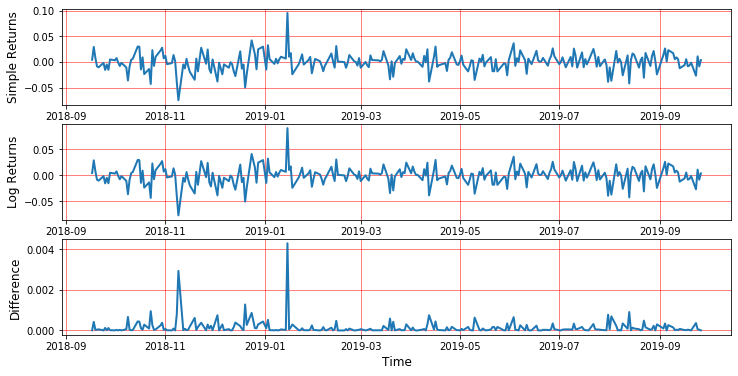

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))
fig.subplots_adjust(hspace=.2, wspace=.3)
axes[0].plot(simple_return_GS, linewidth = 2)
axes[1].plot(log_return_GS, linewidth = 2)
axes[2].plot(simple_return_GS - log_return_GS, linewidth = 2)
axes[2].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Simple Returns', fontsize=12)
axes[1].set_ylabel('Log Returns', fontsize=12)
axes[2].set_ylabel('Difference', fontsize=12)
for i in range(3):
    axes[i].grid(linestyle='-', linewidth='0.5', color='red')

## Application on a portfolio of GS, GOOG, and AAPL

In [11]:
stock_GS = download_stock_data("GS")
stock_GOOG = download_stock_data("GOOG")
stock_AAPL = download_stock_data("AAPL")

simple_return_GS = calculate_stock_return("simple", stock_GS[1])
log_return_GS = calculate_stock_return("log", stock_GS[1]) 
simple_return_GOOG = calculate_stock_return("simple", stock_GOOG[1])
log_return_GOOG = calculate_stock_return("log", stock_GOOG[1])
simple_return_AAPL = calculate_stock_return("simple", stock_AAPL[1])
log_return_AAPL = calculate_stock_return("log", stock_AAPL[1])

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


##### Calculating Returns

In [12]:
simple = [simple_return_GS, simple_return_GOOG, simple_return_AAPL]
log = [log_return_GS, log_return_GOOG, log_return_AAPL]

##### Calculating Standard Deviation

In [13]:
std_dev_simple = [standard_deviation(stock) for stock in simple]
std_dev_log = [standard_deviation(stock) for stock in log]
print(std_dev_simple, std_dev_log)

[0.01749357073621576, 0.01830441501007742, 0.019932431419161695] [0.01749967397264602, 0.018270247902002497, 0.02006501153211275]


##### Calculating semivariance

In [14]:
semivar_simple = [semi_variance(stock) for stock in simple]
semivar_log = [semi_variance(stock) for stock in log]
print(semivar_simple, semivar_log)

[0.00014743146416973502, 0.00016882863229048274, 0.00017287380785071046] [0.00014363230653019414, 0.00016283714885635927, 0.0001695746377957961]


##### Calculating Value at Risk

In [15]:
var_simple = [value_at_risk(0.01, stock) for stock in simple]
var_log = [value_at_risk(0.01, stock) for stock in log]
print(var_simple, var_log)

[-0.04232053663049964, -0.05039427519195436, -0.05475908474260627] [-0.04324227642436307, -0.051708420705281616, -0.05631993770170313]


##### Calculating ES/CVaR

In [16]:
cvar_simple = [expected_shortfall(0.01, stock) for stock in simple]
cvar_log = [expected_shortfall(0.01, stock) for stock in log]
print(cvar_simple, cvar_log)

[-0.055701573488734425, -0.06287198430470287, -0.07466017547315192] [-0.057417543171843256, -0.06500251101322292, -0.07778368009949184]


##### Graphic representation of Results

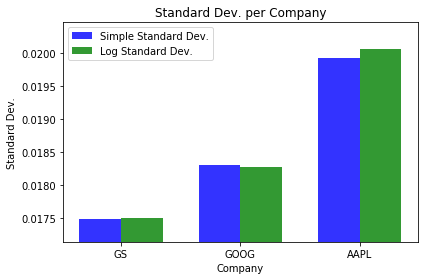

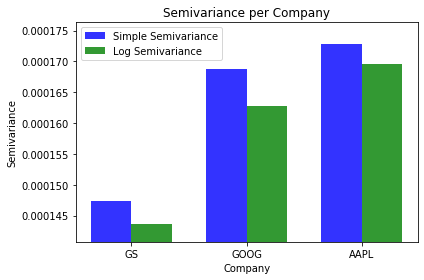

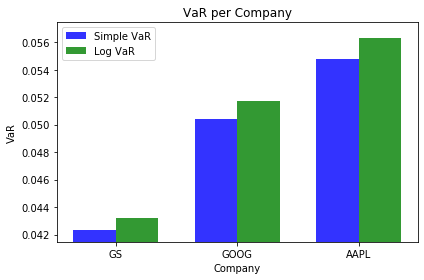

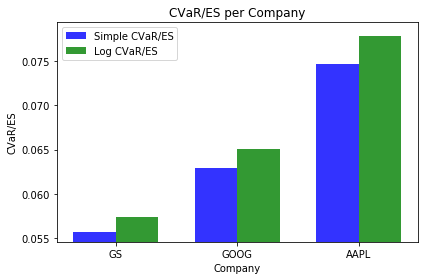

In [17]:
# data to plot

n_groups = 3
simple = []
log = []

simple.append([(std_dev_simple[0], std_dev_simple[1], std_dev_simple[2]), "Standard Dev."])
log.append([(std_dev_log[0], std_dev_log[1], std_dev_log[2])])

simple.append([(semivar_simple[0], semivar_simple[1], semivar_simple[2]), "Semivariance"])
log.append([(semivar_log[0], semivar_log[1], semivar_log[2])])

simple.append([tuple(-1*x for x in (var_simple[0], var_simple[1], var_simple[2])), "VaR"])
log.append([tuple(-1*x for x in (var_log[0], var_log[1], var_log[2]))])

simple.append([tuple(-1*x for x in (cvar_simple[0], cvar_simple[1], cvar_simple[2])), "CVaR/ES"])
log.append([tuple(-1*x for x in (cvar_log[0], cvar_log[1], cvar_log[2]))])

for i in range(4):
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
    
    rects1 = plt.bar(index, simple[i][0], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Simple ' + simple[i][1])

    rects2 = plt.bar(index + bar_width, log[i][0], bar_width,
                     alpha=opacity,
                     color='g',
                     label='Log ' + simple[i][1])
    
    plt.xlabel('Company')
    plt.ylabel(simple[i][1])
    plt.ylim(min(simple[i][0] + log[i][0])*0.98, max(simple[i][0] + log[i][0])*1.02)
    plt.title(simple[i][1] + ' per Company')
    plt.xticks(index + bar_width/2, ('GS', 'GOOG', 'AAPL'))
    plt.legend()

    plt.tight_layout()
    plt.show()

## Working on portfolios

Let's set the following weights $w_0 = 1$, $w_1 = 3$, and $w_2 = 6$, and following stocks $S_{GS}$, $S_{GOOG}$, and $S_{AAPL}$ so that a series of portfolios $P_n$ are set such as:

1. $P_0 = w_0 * S_{GS} + w_ 1 * S_{GOOG} + w_2 * S_{AAPL}$
2. $P_0 = w_0 * S_{AAPL} + w_ 1 * S_{GS} + w_2 * S_{GOOG}$
3. $P_0 = w_0 * S_{GOOG} + w_ 1 * S_{AAPL} + w_2 * S_{GS}$

We will calcualte the VaR and CVaR/ES of each portfolio and evaluate their riskiness order.

In [18]:
W = [[1, 3, 6], [3, 6, 1], [6, 1, 3]]
PTF = []

for i in range(3):
    holder_GS = W[i][0] * stock_GS[1]
    holder_GOOG = W[i][1] * stock_GOOG[1]
    holder_AAPL = W[i][2] * stock_AAPL[1]
    PTF.append(holder_GS.add(holder_GOOG.add(holder_AAPL, 
                                             fill_value=0), 
                             fill_value=0))

PTF_simple = [calculate_stock_return("simple", x) for x in PTF]
PTF_log = [calculate_stock_return("log", x) for x in PTF]

# Calculate VaR and CVaR/ES
VaR_simple = [[value_at_risk(0.05, x) for x in PTF_simple], 
              [value_at_risk(0.01, x) for x in PTF_simple]]
VaR_log = [[value_at_risk(0.05, x) for x in PTF_log], 
              [value_at_risk(0.01, x) for x in PTF_log]]

ES_simple = [[expected_shortfall(0.05, x) for x in PTF_simple], 
             [expected_shortfall(0.01, x) for x in PTF_simple]]
ES_log = [[expected_shortfall(0.05, x) for x in PTF_log], 
          [expected_shortfall(0.01, x) for x in PTF_log]]

PTFS = []

for i in range(3):
    PTFS.append([])
    PTFS[i].append(f"PTF {i}")
    PTFS[i].append(round(VaR_simple[0][i], 4))
    PTFS[i].append(round(VaR_log[0][i], 4))
    PTFS[i].append(round(VaR_simple[1][i], 4))
    PTFS[i].append(round(VaR_log[1][i], 4))
    PTFS[i].append(round(ES_simple[0][i], 4))
    PTFS[i].append(round(ES_log[0][i], 4))
    PTFS[i].append(round(ES_simple[1][i], 4))
    PTFS[i].append(round(ES_log[1][i], 4))

table = [["Portfolio","VaR 5% simple","VaR 5% log","VaR 1% simple","VaR 1% log",
         "ES 5% simple","ES 5% log","ES 1% simple","ES 1% log"],
         PTFS[0],
         PTFS[1],
         PTFS[2]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

Portfolio,VaR 5% simple,VaR 5% log,VaR 1% simple,VaR 1% log,ES 5% simple,ES 5% log,ES 1% simple,ES 1% log
PTF 0,-0.0313,-0.0318,-0.0474,-0.0485,-0.042,-0.0429,-0.0526,-0.0541
PTF 1,-0.029,-0.0295,-0.0492,-0.0504,-0.0415,-0.0425,-0.0582,-0.06
PTF 2,-0.0267,-0.0271,-0.0432,-0.0441,-0.0384,-0.0392,-0.0466,-0.0478


In [19]:
# Calculate the order of each VaR and CVaR/ES
VaR_simple = [[sorted(VaR_simple[0], reverse=True).index(x) for x in VaR_simple[0]], 
              [sorted(VaR_simple[1], reverse=True).index(x) for x in VaR_simple[1]]]
VaR_log = [[sorted(VaR_log[0], reverse=True).index(x) for x in VaR_log[0]], 
           [sorted(VaR_log[1], reverse=True).index(x) for x in VaR_log[1]]]

ES_simple = [[sorted(ES_simple[0], reverse=True).index(x) for x in ES_simple[0]], 
             [sorted(ES_simple[1], reverse=True).index(x) for x in ES_simple[1]]]
ES_log = [[sorted(ES_log[0], reverse=True).index(x) for x in ES_log[0]], 
          [sorted(ES_log[1], reverse=True).index(x) for x in ES_log[1]]]

PTFS = []

for i in range(3):
    PTFS.append([])
    PTFS[i].append(f"PTF {i}")
    PTFS[i].append(VaR_simple[0][i])
    PTFS[i].append(VaR_log[0][i])
    PTFS[i].append(VaR_simple[1][i])
    PTFS[i].append(VaR_log[1][i])
    PTFS[i].append(ES_simple[0][i])
    PTFS[i].append(ES_log[0][i])
    PTFS[i].append(ES_simple[1][i])
    PTFS[i].append(ES_log[1][i])

table = [["Portfolio","VaR 5% simple","VaR 5% log","VaR 1% simple","VaR 1% log",
         "ES 5% simple","ES 5% log","ES 1% simple","ES 1% log"],
         PTFS[0],
         PTFS[1],
         PTFS[2]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

Portfolio,VaR 5% simple,VaR 5% log,VaR 1% simple,VaR 1% log,ES 5% simple,ES 5% log,ES 1% simple,ES 1% log
PTF 0,2,2,1,1,2,2,1,1
PTF 1,1,1,2,2,1,1,2,2
PTF 2,0,0,0,0,0,0,0,0


Based on the table above, it is clear that portfolio 2 is the least risky!

## CONCLUSION

##### Equations

In the case of a single stock, the logarithmic return has an advantage against the simple return. As a multi-period logarithmic return, it can be calculated as a sum of the one-period logarithmic returns, while the multi-period simple return is the product of the one-period simple returns, which can lead to computational issues for values close to zero.

##### Portfolios

It is important to highlight that the portfolio weights depend on the price of stocks in the portfolio. They change with time. In the case of an equally weighted portfolio, one has to balance it regularly.

1. The simple return of a portfolio is the sum of the weighted simple returns of the constituents of the considered portfolio. 

2. In contrast, the logarithmic return of a portfolio can only be approximated by the sum of the weighted logarithmic returns of the constituents of the considered portfolio.

##### I.E.

The two types act very differently when it comes to aggregation.  Each has an advantage over the other:

> simple returns aggregate across assets

> log returns aggregate across time

> The simple return of a portfolio is the weighted sum of the simple returns of the constituents of the portfolio.

The log return for a time period is the sum of the log returns of partitions of the time period.  For example the log return for a year is the sum of the log returns of the days within the year.

For further explanation please have a look at:

> https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/